## K MEANS CLUSTERING EXAMPLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate a smaller dataset with 30 data points
n_customers = 40
ages = np.random.randint(18, 70, size=n_customers)  # Age ranging from 18 to 70
annual_income = np.random.normal(50000, 15000, n_customers)  # Average income around $50,000 with some variation
spending_score = np.random.normal(50, 20, n_customers)  # Spending score (a score assigned based on spending habits)

# Combine the features into a DataFrame without clusters
customer_data = pd.DataFrame({
    'Age': ages,
    'Annual Income (USD)': annual_income,
    'Spending Score (1-100)': spending_score
})

customer_data

,Age,Annual Income (USD),Spending Score (1-100)
0,56,41834.259132,66.250516
1,69,51663.838846,77.124801
2,46,32735.096339,48.559798
3,32,55635.470275,70.070658
4,60,40990.419651,57.232721
5,25,45624.593753,37.097605
6,38,40974.400817,57.227912
7,56,77784.172768,80.760731
8,36,49797.541629,49.283479
9,40,34134.336066,81.292873


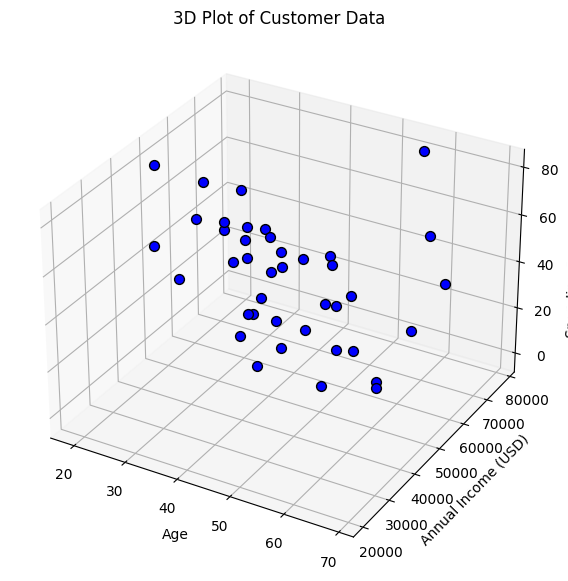

In [3]:
# Set up the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(customer_data['Age'],
           customer_data['Annual Income (USD)'],
           customer_data['Spending Score (1-100)'],
           marker='o', edgecolor='k', s=50, c='b',
           depthshade=False)

# Set plot titles and labels
ax.set_title('3D Plot of Customer Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (USD)')
ax.set_zlabel('Spending Score (1-100)')

# Show the plot
plt.show()

In [4]:
# Apply K-Means clustering with 3 clusters
kmeans_model = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans_model.fit_predict(customer_data)

# Display the resulting DataFrame with the assigned clusters
print(customer_data)

    Age  Annual Income (USD)  Spending Score (1-100)  Cluster
0    56         41834.259132               66.250516        2
1    69         51663.838846               77.124801        1
2    46         32735.096339               48.559798        0
3    32         55635.470275               70.070658        1
4    60         40990.419651               57.232721        2
5    25         45624.593753               37.097605        2
6    38         40974.400817               57.227912        2
7    56         77784.172768               80.760731        1
8    36         49797.541629               49.283479        2
9    40         34134.336066               81.292873        0
10   28         62338.173682               -2.394902        1
11   28         31687.345250               66.438050        0
12   41         53132.953925               51.740941        1
13   53         20604.948142               44.019853        0
14   57         30077.209267               51.835216        0
15   41 

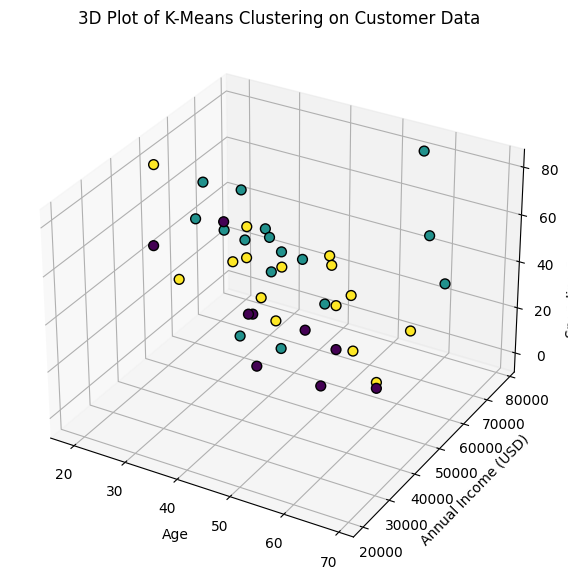

In [5]:
# Create a 3D plot for the clustered data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points using the cluster labels for coloring
ax.scatter(customer_data['Age'],
           customer_data['Annual Income (USD)'],
           customer_data['Spending Score (1-100)'],
           c=customer_data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, depthshade=False)

# Set plot titles and labels
ax.set_title('3D Plot of K-Means Clustering on Customer Data')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (USD)')
ax.set_zlabel('Spending Score (1-100)')

# Show the plot
plt.show()

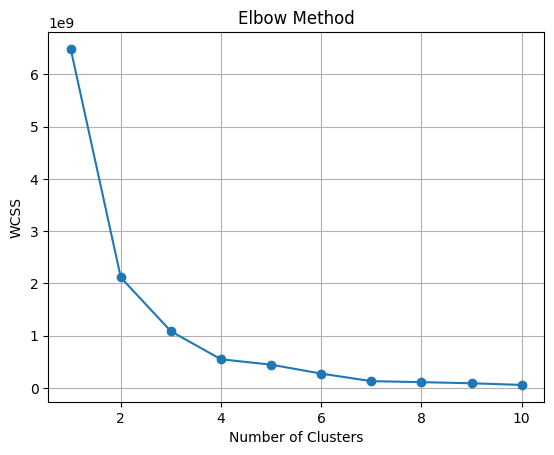

In [6]:
# Create a list to store the WCSS values for different numbers of clusters
wcss = []

# Calculate WCSS for cluster numbers ranging from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# HIERARCHIAL CLUSTERING EXAMPLE

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

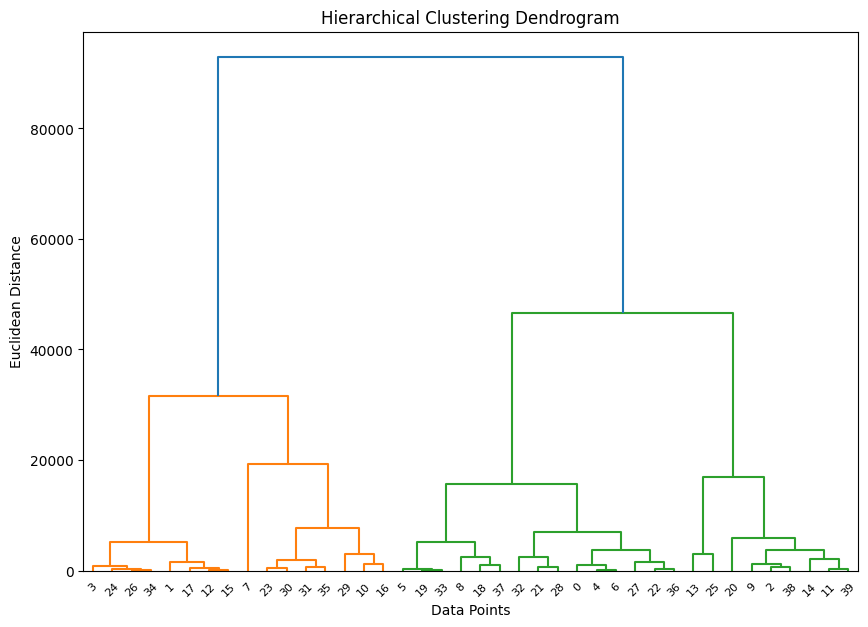

In [8]:
# Perform hierarchical clustering using the 'ward' method
Z = linkage(customer_data[['Age', 'Annual Income (USD)', 'Spending Score (1-100)']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

## PCA EXAMPLE

    Principal Component 1  Principal Component 2
0            -4901.995114              14.914423
1             4927.577385              24.306481
2           -14001.151316              -1.618517
3             8899.224097              22.667782
4            -5745.835211               5.388426
5            -1111.645353              -9.452572
6            -5761.845182               8.455683
7            31047.913913              30.896437
8             3061.296485               1.265021
9           -12601.912639              31.694572
10           15601.935943             -48.227446
11          -15048.896891              18.551437
12            6396.706212               3.148254
13          -26131.300819              -7.636826
14          -16659.042924              -0.031035
15            6216.675082             -37.945394
16           14340.759386               0.364120
17            5834.276806               8.750675
18            1529.034506              33.548155
19           -1252.8

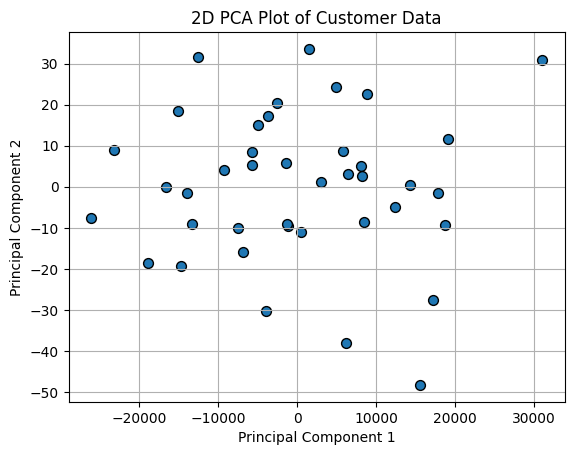

In [9]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions of the customer data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_data)

# Create a DataFrame with the 2 principal components
pca_df = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Display the resulting DataFrame
print(pca_df)

# Plot the 2D data points after PCA
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], marker='o', edgecolor='k', s=50)
plt.title('2D PCA Plot of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
